# Trending Skill Analyis

## How are skills trending for Data Analysts on a monthly basis

In [3]:
# importing libraries
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
# reading data
df = pd.read_csv('Data Jobs in India.csv', encoding = 'unicode_escape')

In [7]:
# printing data
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,15-06-2023 13:28,False,False,India,NaN,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'..."
1,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,26-04-2023 13:20,False,False,India,NaN,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['..."
2,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,26-03-2023 13:16,False,False,India,NaN,NaN,NaN,Exusia,NaN,NaN
3,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,23-07-2023 13:24,False,False,India,NaN,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'..."
4,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,10-11-2023 13:30,True,False,India,NaN,NaN,NaN,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51083,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,13-03-2023 06:16,False,False,India,NaN,NaN,NaN,Varite India Private Limited,"['excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']}"
51084,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,13-03-2023 06:16,False,False,India,NaN,NaN,NaN,Amul,NaN,NaN
51085,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,13-03-2023 06:16,False,False,India,NaN,NaN,NaN,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}"
51086,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,13-03-2023 06:16,False,False,India,NaN,NaN,NaN,Diebold Nixdorf,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51088 entries, 0 to 51087
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_title_short        51088 non-null  object 
 1   job_title              51088 non-null  object 
 2   job_location           51086 non-null  object 
 3   job_via                51088 non-null  object 
 4   job_schedule_type      50993 non-null  object 
 5   job_work_from_home     51088 non-null  bool   
 6   search_location        51088 non-null  object 
 7   job_posted_date        51088 non-null  object 
 8   job_no_degree_mention  51088 non-null  bool   
 9   job_health_insurance   51088 non-null  bool   
 10  job_country            51088 non-null  object 
 11  salary_rate            589 non-null    object 
 12  salary_year_avg        582 non-null    float64
 13  salary_hour_avg        7 non-null      float64
 14  company_name           51085 non-null  object 
 15  jo

In [23]:

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [25]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [27]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

In [29]:
df_DA_explode= df_DA.explode('job_skills')

In [31]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_pivot

job_skills,airflow,alteryx,angular,ansible,arch,asana,asp.net,assembly,atlassian,aurora,...,vue.js,watson,webex,windows,wire,word,workfront,wrike,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,3,21,1,0,0,0,1,0,0,0,...,0,0,1,4,1,37,0,0,0,3
2,7,17,1,0,2,0,0,1,0,1,...,0,1,1,5,0,24,0,0,0,0
3,6,16,2,1,0,0,0,1,1,0,...,0,0,0,5,0,27,0,0,0,2
4,8,8,1,0,4,0,1,2,0,0,...,0,0,1,4,0,27,0,0,0,1
5,5,13,0,0,1,0,0,0,0,0,...,0,0,0,5,0,13,0,0,0,0
6,5,22,1,0,0,0,1,0,0,1,...,0,0,0,1,0,12,1,0,0,1
7,10,13,2,0,1,0,0,0,0,1,...,0,4,0,4,0,22,0,0,0,2
8,19,25,2,0,0,0,0,0,2,0,...,0,1,0,4,0,31,0,0,1,1
9,4,14,0,0,0,2,0,0,1,5,...,0,0,0,2,0,28,0,0,1,2


In [33]:
# Create a total row
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
# Order columns by total count
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
# Drop total row
df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,0,0,0,1,0,0,0,0,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,1,0,0,0,0,0,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,1,0,0,0,0,0,1,0,0
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,1
7,245,161,174,124,93,67,78,39,31,31,...,0,0,0,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,1,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# code snippet from `6_Exercise_Job_Demand.ipynb`
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

df_DA_pivot


job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,305,216,218,159,98,89,128,46,32,43,...,0,0,0,0,1,0,0,0,0,0
Feb,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
Mar,229,151,138,125,76,58,62,45,38,29,...,0,0,1,0,0,0,0,0,0,0
Apr,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
May,155,101,106,71,61,42,30,33,22,19,...,0,1,0,0,0,0,0,1,0,0
Jun,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,1
Jul,245,161,174,124,93,67,78,39,31,31,...,0,0,0,0,0,0,0,0,0,0
Aug,317,216,192,152,127,112,98,52,63,40,...,0,0,0,1,0,0,0,0,0,0
Sep,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


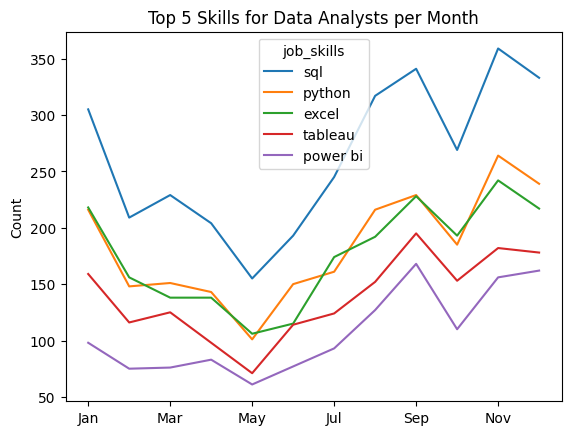

In [37]:
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()